<a href="https://colab.research.google.com/github/pragatipatel26/mini_assignment1/blob/main/assignment1_deepflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [77]:
from google.colab import files
uploaded = files.upload()

Saving data.xlsx to data (2).xlsx


In [79]:
import pandas as pd
dataset=pd.read_excel('data.xlsx')
#structure of dataset
print(dataset.head())
print(dataset.tail())
print(dataset.shape)
print(dataset.columns)
print(dataset.dtypes)
print(dataset.info())



                    name online_order book_table  Rating  votes      location  \
0                  Jalsa          Yes        Yes     4.1    775  Banashankari   
1         Spice Elephant          Yes         No     4.1    787  Banashankari   
2        San Churro Cafe          Yes         No     3.8    918  Banashankari   
3  Addhuri Udupi Bhojana           No         No     3.7     88  Banashankari   
4          Grand Village           No         No     3.8    166  Basavanagudi   

             rest_type                        cuisines  \
0        Casual Dining  North Indian, Mughlai, Chinese   
1        Casual Dining     Chinese, North Indian, Thai   
2  Cafe, Casual Dining          Cafe, Mexican, Italian   
3          Quick Bites      South Indian, North Indian   
4        Casual Dining        North Indian, Rajasthani   

   approx_cost(for two people) listed_in(type) listed_in(city)  
0                          800          Buffet    Banashankari  
1                          800    

In [80]:
#missing values
dataset.isnull().sum()

,0
name,0
online_order,0
book_table,0
Rating,0
votes,0
location,0
rest_type,0
cuisines,0
approx_cost(for two people),0
listed_in(type),0


In [81]:
#handling duplicates
duplicates = dataset.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")
dataset.drop_duplicates(inplace=True)


Number of duplicate rows: 73


In [97]:
#code for correcting the name of restaurants
def recursive_decode(text, max_attempts=5):
    if not isinstance(text, str):
        return text

    for _ in range(max_attempts):
        try:
            decoded = text.encode('latin1').decode('utf-8')
            if decoded == text:
                break
            text = decoded
        except (UnicodeEncodeError, UnicodeDecodeError):
            break
    return text

dataset['name'] = dataset['name'].apply(recursive_decode)


In [98]:
# Fixing cuisines format
dataset['cuisines'] = dataset['cuisines'].str.strip().str.replace(', ', ',')

# Fixing garbled names example
dataset['name'] = dataset['name'].replace({
    'CafÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂ© Down The Alley': 'Café Down The Alley'
})

In [99]:
#Standardising key columns like ratings, price, and location
dataset['Rating'] = pd.to_numeric(dataset['Rating'], errors='coerce')
dataset['approx_cost(for two people)'] = dataset['approx_cost(for two people)'].astype(str).str.replace(',', '')
dataset['approx_cost(for two people)'] = pd.to_numeric(dataset['approx_cost(for two people)'], errors='coerce')
dataset['location'] = dataset['location'].str.strip().str.title()

In [100]:
#Converting columns to appropriate data types (e.g., float, int, datetime)
dataset['Rating'] = pd.to_numeric(dataset['Rating'], errors='coerce')
dataset['votes'] = pd.to_numeric(dataset['votes'], errors='coerce').fillna(0).astype(int)
dataset['approx_cost(for two people)'] = pd.to_numeric(dataset['approx_cost(for two people)'], errors='coerce').fillna(0).astype(int)

In [101]:
#Saving the dataset as df
dataset.to_excel('df.xlsx', index=False)


In [103]:
from google.colab import files
files.download('df.xlsx')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [104]:
uploaded = files.upload()
datasheet_1=pd.read_excel('df.xlsx')

Saving df.xlsx to df (5).xlsx


In [105]:
##comparing cuisines on the basis of rating and votes
#splitting the cuisine string into list
datasheet_1['cuisines'] = datasheet_1['cuisines'].astype(str).str.replace(r"[\[\]']", '', regex=True)
datasheet_1['cuisines'] = datasheet_1['cuisines'].astype(str).str.replace('"', '').str.strip()

datasheet_1['cuisines'] = datasheet_1['cuisines'].astype(str).str.split(',').apply(lambda x: [c.strip() for c in x])
datasheet_exploded=datasheet_1.explode('cuisines')


In [106]:
#calculaing average rating,votes and price ranges
result=datasheet_exploded.groupby('cuisines').agg({'Rating': 'mean', 'votes': 'sum', 'approx_cost(for two people)': 'mean'}).round(2).reset_index()


In [107]:
#printing average values
result.rename(columns={
    'Rating': 'Avg_Rating',
    'votes': 'Avg_Votes',
    'approx_cost(for two people)': 'Avg_Cost_For_Two'
}, inplace=True)
print(result.sort_values(by='Avg_Rating', ascending=False))


       cuisines  Avg_Rating  Avg_Votes  Avg_Cost_For_Two
24    Cantonese        4.60      14122           2800.00
2       African        4.52      11083           1047.06
88  Singaporean        4.41      56700           1268.09
13      Belgian        4.37       2030            500.00
59    Malaysian        4.32     137925           1379.72
..          ...         ...        ...               ...
42     Hot dogs        3.50         31            366.67
51     Kashmiri        3.43       4172            759.09
31  Drinks Only        3.30         20            100.00
74         Paan        3.30         12            100.00
75    Pan Asian        3.00         13            400.00

[105 rows x 4 columns]


In [108]:
#downloading cuisine analysis excel sheet
result.to_excel('cuisine_analysis.xlsx', index=False)
files.download('cuisine_analysis.xlsx')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [109]:
uploaded = files.upload()
datasheet_1=pd.read_excel('cuisine_analysis.xlsx')

Saving cuisine_analysis.xlsx to cuisine_analysis (2).xlsx


In [110]:
#finding which cuisines are best on basis of average rating and votes
new_df = pd.read_excel('cuisine_analysis.xlsx')

# Sorting by Avg_Rating (descending)
top_rated = new_df.sort_values(by='Avg_Rating', ascending=False)

# Sorting by Avg_Votes (descending)
most_popular = new_df.sort_values(by='Avg_Votes', ascending=False)

# Displaying top 10 cuisines by rating
print("Top 10 Cuisines by Average Rating:")
print(top_rated[['cuisines', 'Avg_Rating']].head(10))

# Displaying top 10 cuisines by popularity
print("\nTop 10 Cuisines by Popularity (Votes):")
print(most_popular[['cuisines', 'Avg_Votes']].head(10))


Top 10 Cuisines by Average Rating:
          cuisines  Avg_Rating
24       Cantonese        4.60
2          African        4.52
88     Singaporean        4.41
13         Belgian        4.37
59       Malaysian        4.32
65   Modern Indian        4.31
92      Sri Lankan        4.31
102          Vegan        4.30
49          Jewish        4.30
36          German        4.29

Top 10 Cuisines by Popularity (Votes):
        cuisines  Avg_Votes
72  North Indian    6758373
29   Continental    4319653
27       Chinese    4035291
23          Cafe    2830758
47       Italian    2590169
3       American    2038705
21        Burger    1459703
77         Pizza    1381679
90  South Indian    1311055
30      Desserts    1251123


In [112]:
import seaborn as sns
import matplotlib.pyplot as plt

<ipython-input-120-7833a875698d>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_cuisines_by_rating.values, y=top_cuisines_by_rating.index, palette='coolwarm')


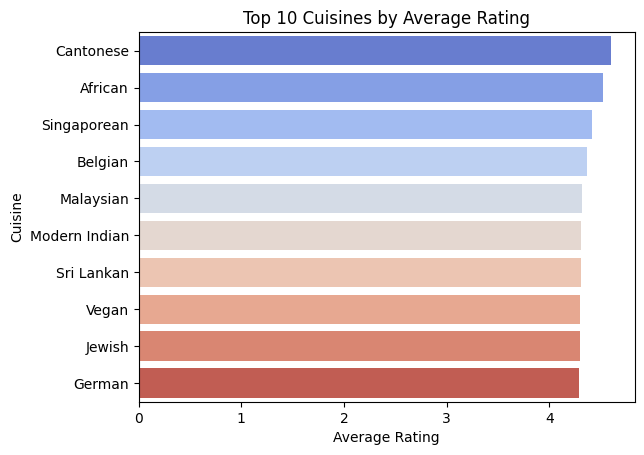

<ipython-input-120-7833a875698d>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_cuisines_by_votes.values, y=top_cuisines_by_votes.index, palette='crest')


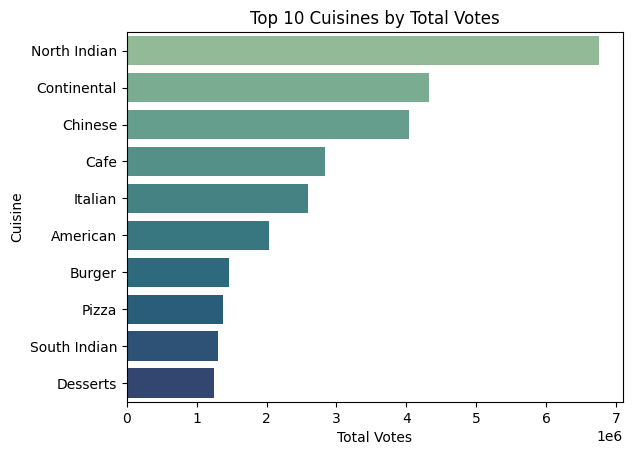

In [120]:
#Plotting top ten cuisines by rating
top_cuisines_by_rating = top_rated.set_index('cuisines')['Avg_Rating'].head(10)
sns.barplot(x=top_cuisines_by_rating.values, y=top_cuisines_by_rating.index, palette='coolwarm')
plt.title('Top 10 Cuisines by Average Rating')
plt.xlabel('Average Rating')
plt.ylabel('Cuisine')
plt.show()

#Plotting top ten cuisines by votes
top_cuisines_by_votes = most_popular.set_index('cuisines')['Avg_Votes'].head(10)
sns.barplot(x=top_cuisines_by_votes.values, y=top_cuisines_by_votes.index, palette='crest')
plt.title('Top 10 Cuisines by Total Votes')
plt.xlabel('Total Votes')
plt.ylabel('Cuisine')
plt.show()



In [121]:
##Top restaurant for each cuisine
# Load dataset
df = pd.read_excel('df.xlsx')

# Clean and convert Rating
df['Rating'] = pd.to_numeric(df['Rating'], errors='coerce')
df = df.dropna(subset=['Rating'])

# Expanding multiple cuisines
df['cuisines'] = df['cuisines'].astype(str)
df_expanded = df.assign(cuisines=df['cuisines'].str.split(',')).explode('cuisines')
df_expanded['cuisines'] = df_expanded['cuisines'].str.strip()

#Sorting by rating and votes
df_sorted = df_expanded.sort_values(by=['cuisines', 'Rating', 'votes'], ascending=[True, False, False])

#Picking the top-rated restaurant per cuisine
top_by_cuisine = df_sorted.groupby('cuisines').first().reset_index()

#Selecting relevant columns
top_by_cuisine = top_by_cuisine[['cuisines', 'name', 'Rating', 'votes', 'location','approx_cost(for two people)']]

#Sorting cuisines alphabetically
top_by_cuisine = top_by_cuisine.sort_values(by='cuisines').reset_index(drop=True)



In [122]:
#Downloading top restaurant for each cusisine file
top_by_cuisine.to_excel('top_restaurant_by_cuisine.xlsx', index=False)
files.download('top_restaurant_by_cuisine.xlsx')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [132]:
#final visualization of the dataset
#Loading cleaned dataset
df = pd.read_excel('df.xlsx')
df['Rating'] = pd.to_numeric(df['Rating'], errors='coerce')
df['votes'] = pd.to_numeric(df['votes'], errors='coerce')
df.dropna(subset=['Rating'], inplace=True)

df['cuisines'] = df['cuisines'].astype(str)
df_expanded = df.assign(cuisines=df['cuisines'].str.split(',')).explode('cuisines')
df_expanded['cuisines'] = df_expanded['cuisines'].str.strip()

#Grouping by cuisine to get insights
cuisine_insights = df_expanded.groupby('cuisines').agg(
    Num_Restaurants=('name', 'count'),
    Avg_Rating=('Rating', 'mean'),
    Total_Votes=('votes', 'sum'),
    Avg_Votes=('votes', 'mean')
).reset_index()

#Sorting by popularity
cuisine_insights = cuisine_insights.sort_values(by='Total_Votes', ascending=False)

#Saving insights to Excel
cuisine_insights.to_excel('cuisine_user_preferences.xlsx', index=False)
files.download('cuisine_user_preferences.xlsx')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<ipython-input-133-567ad5e1e644>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Num_Restaurants', y='cuisines', data=top_restaurants, palette='viridis')


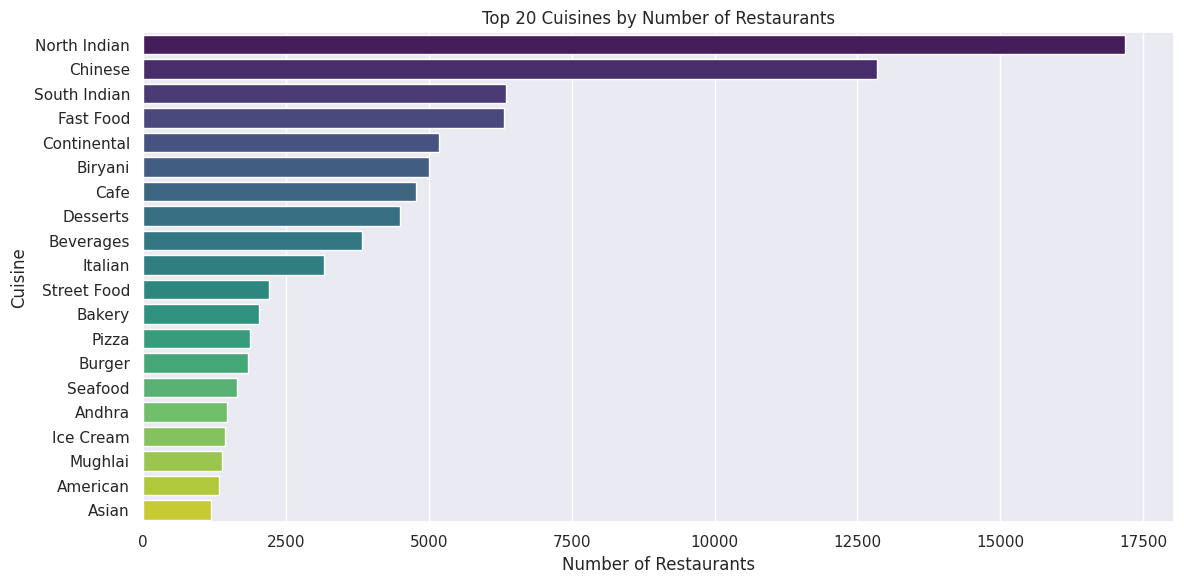

<ipython-input-133-567ad5e1e644>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Avg_Rating', y='cuisines', data=top_rated, palette='coolwarm')


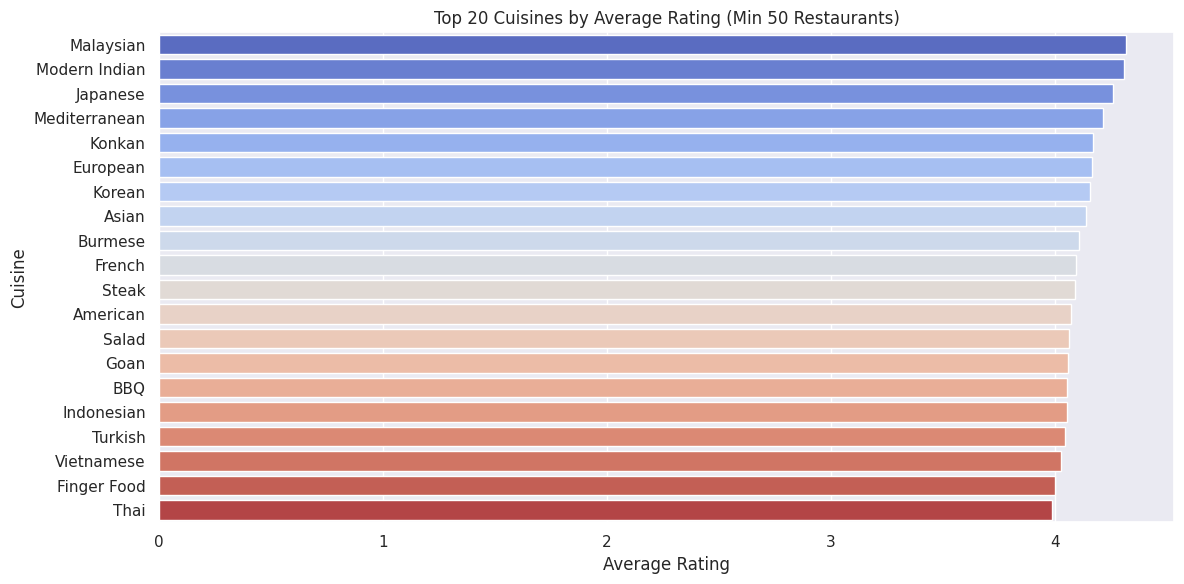

<ipython-input-133-567ad5e1e644>:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Total_Votes', y='cuisines', data=top_votes, palette='rocket')


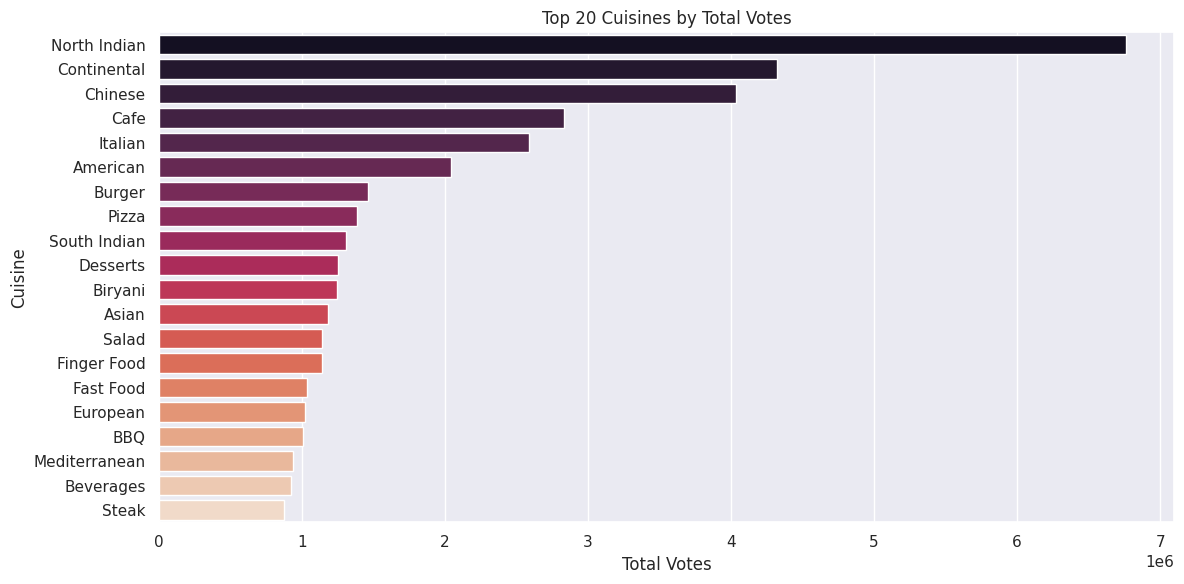

In [133]:
sns.set_style('whitegrid')
sns.set(rc={'figure.figsize': (12, 6)})

# Plotting top 20 cuisines by number of restaurants
top_restaurants = cuisine_insights.sort_values('Num_Restaurants', ascending=False).head(20)
sns.barplot(x='Num_Restaurants', y='cuisines', data=top_restaurants, palette='viridis')
plt.title('Top 20 Cuisines by Number of Restaurants')
plt.xlabel('Number of Restaurants')
plt.ylabel('Cuisine')
plt.tight_layout()
plt.show()

#Plotting top 20 cuisines by average rating (filtering only those with enough restaurants, e.g. > 50)
top_rated = cuisine_insights[cuisine_insights['Num_Restaurants'] > 50] \
    .sort_values('Avg_Rating', ascending=False).head(20)
sns.barplot(x='Avg_Rating', y='cuisines', data=top_rated, palette='coolwarm')
plt.title('Top 20 Cuisines by Average Rating (Min 50 Restaurants)')
plt.xlabel('Average Rating')
plt.ylabel('Cuisine')
plt.tight_layout()
plt.show()

#Plotting top 20 cuisines by popularity (total votes)
top_votes = cuisine_insights.sort_values('Total_Votes', ascending=False).head(20)
sns.barplot(x='Total_Votes', y='cuisines', data=top_votes, palette='rocket')
plt.title('Top 20 Cuisines by Total Votes')
plt.xlabel('Total Votes')
plt.ylabel('Cuisine')
plt.tight_layout()
plt.show()


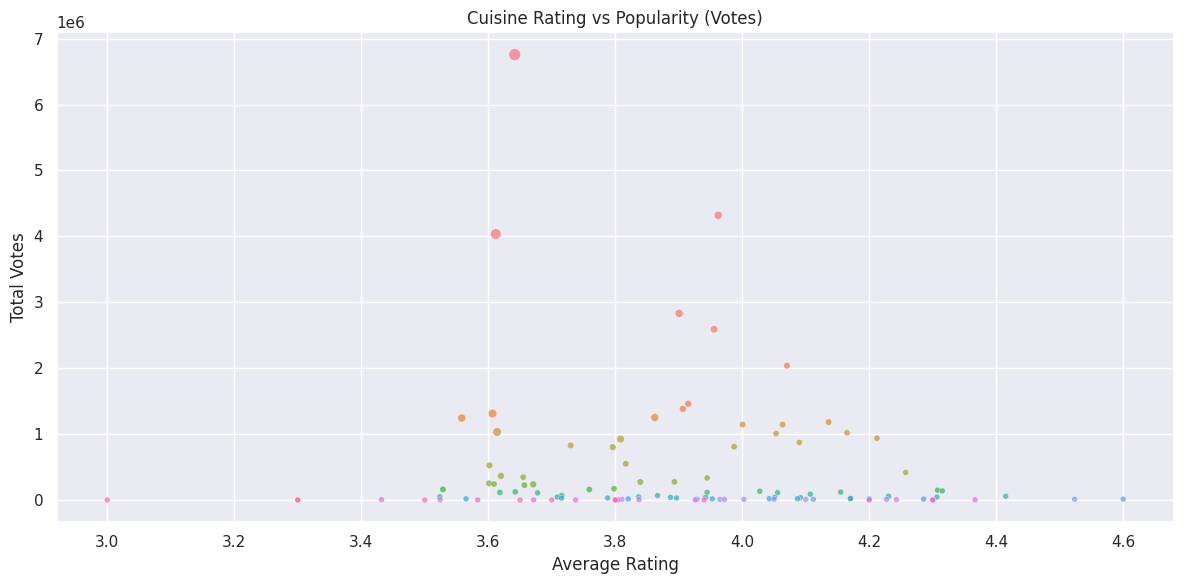

In [134]:
# Cuisine Rating vs Popularity (Votes)
#Finding whether high-rated cuisines are also the most popular.
plt.figure(figsize=(12, 6))
sns.scatterplot(data=cuisine_insights, x='Avg_Rating', y='Total_Votes', size='Num_Restaurants', hue='cuisines', legend=False, alpha=0.7)
plt.title('Cuisine Rating vs Popularity (Votes)')
plt.xlabel('Average Rating')
plt.ylabel('Total Votes')
plt.grid(True)
plt.tight_layout()
plt.show()


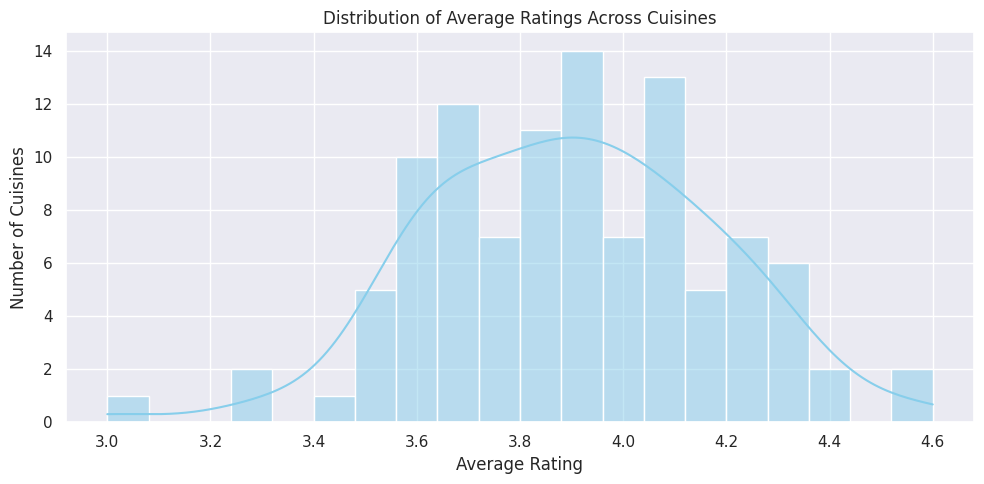

In [135]:
#Rating Distribution of All Cuisines
plt.figure(figsize=(10, 5))
sns.histplot(cuisine_insights['Avg_Rating'], bins=20, kde=True, color='skyblue')
plt.title('Distribution of Average Ratings Across Cuisines')
plt.xlabel('Average Rating')
plt.ylabel('Number of Cuisines')
plt.tight_layout()
plt.show()

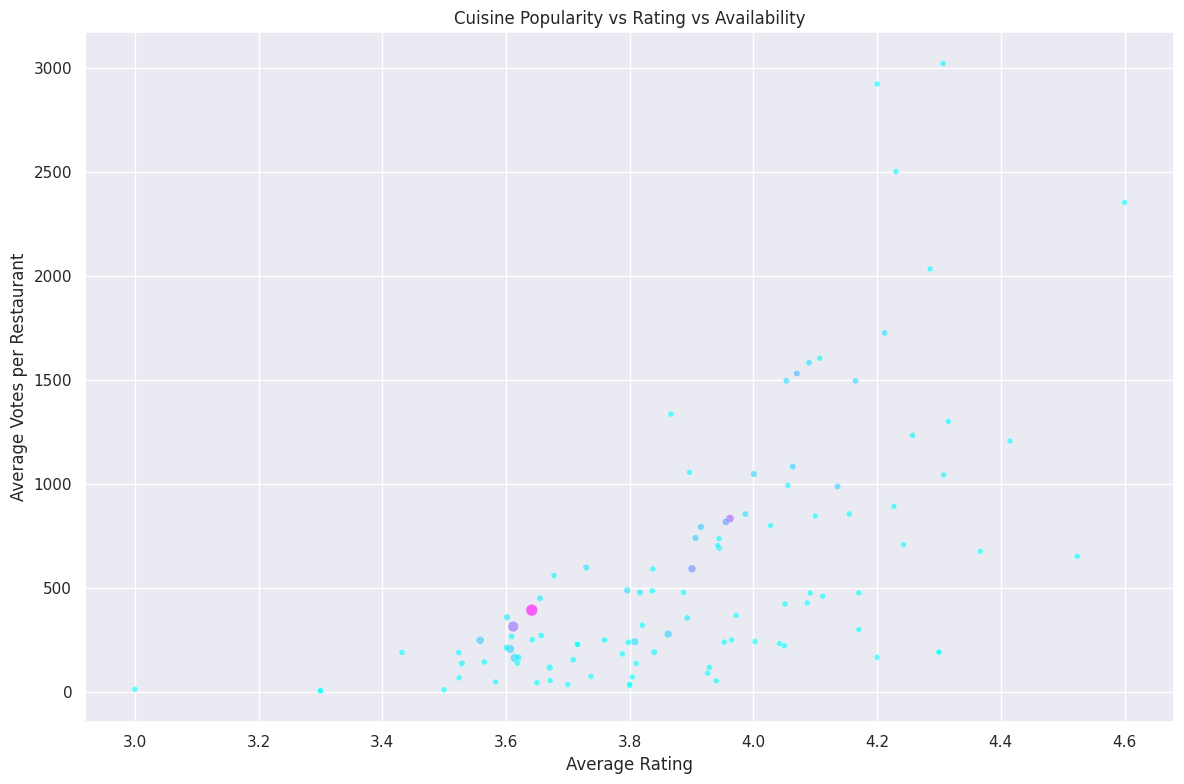

In [136]:
#Bubble Chart – Popularity vs Rating vs Availability
plt.figure(figsize=(12, 8))
sns.scatterplot(data=cuisine_insights, x='Avg_Rating', y='Avg_Votes', size='Num_Restaurants', hue='Total_Votes', palette='cool', alpha=0.6, legend=False)
plt.title('Cuisine Popularity vs Rating vs Availability')
plt.xlabel('Average Rating')
plt.ylabel('Average Votes per Restaurant')
plt.grid(True)
plt.tight_layout()
plt.show()
